# Business Understanding

# Data Understanding

# Data Preparation

In [1]:
#load data
!pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel file (replace 'your_file.xlsx' with the actual file name)
file_path = 'ASSET REGISTER ICT final.xlsx'

# Read the file
df = pd.read_excel(file_path, header=0)
df.head()

,Asset Description,Financed by/ source of funds,Serial number,Tag number,Date of Delivery / installation,PV number,Original Location,Current Location,Replacement Date (if applicable),Purchase amount,Depreciation rate,Annual depreciation,Accumulated depreciation,Net Book Value,Date of disposal,Disposal value,Responsible officer,Asset condition,Notes
0,keyboard,GOK,9CT35003CU,NK,NK,NaN,NK,Director Regional Development,NaN,NK,0.3,0,0,0,NaN,NaN,Wanjiku,Serviceable,NaN
1,keyboard,GOK,NK,MEAC&RNCD/KYB/33,NK,NaN,NK,Front Office regional development,NaN,NK,0.3,0,0,0,NaN,NaN,Divina,Serviceable,NaN
2,keyboard,GOK,NK,NK,NK,NaN,NK,Front Office regional development,NaN,NK,0.3,0,0,0,NaN,NaN,Nasri,Serviceable,NaN
3,keyboard,GOK,TA/HW/KBL27,NK,NK,NaN,NK,Front Office Deputy Director regional development,NaN,NK,0.3,0,0,0,NaN,NaN,Dosio,Serviceable,NaN
4,keyboard,GOK,NK,MEAC&RNCD/KYB/18,NK,NaN,NK,Deputy Director Regional Development,NaN,NK,0.3,0,0,0,NaN,NaN,Wainaina,Serviceable,NaN


In [2]:
print(df.shape)
print( )
print(df.info())

(354, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Asset Description                  354 non-null    object 
 1   Financed by/ source of funds       354 non-null    object 
 2   Serial number                      340 non-null    object 
 3   Tag number                         284 non-null    object 
 4   Date of Delivery / installation    354 non-null    object 
 5   PV number                          0 non-null      float64
 6   Original Location                  353 non-null    object 
 7   Current Location                   350 non-null    object 
 8   Replacement Date (if applicable)   0 non-null      float64
 9   Purchase amount                    354 non-null    object 
 10  Depreciation rate                  354 non-null    float64
 11  Annual depreciation                354 non-null

Our data has 19 columns and 358 rows.

In [3]:
print(df.columns)


Index(['Asset Description ', 'Financed by/ source of funds', 'Serial number ',
       'Tag number', 'Date of Delivery / installation', 'PV number',
       'Original Location ', 'Current Location ',
       'Replacement Date (if applicable) ', 'Purchase amount ',
       'Depreciation rate', 'Annual depreciation', 'Accumulated depreciation',
       'Net Book Value', 'Date of disposal', 'Disposal value',
       'Responsible officer', 'Asset condition', 'Notes'],
      dtype='object')


In [4]:
# drop unwanted columns
# Clean column names by removing leading and trailing spaces
df.columns = df.columns.str.strip()

# Now, you can define your columns to keep (no extra spaces)
columns_to_keep = [
    'Responsible officer',
    'Current Location',
    'Tag number',
    'Serial number',
    'Depreciation rate',
    'Financed by/ source of funds',
    'Asset Description',
    'Asset condition'
]

# Now selection will work
df = df[columns_to_keep]

# Confirm it's cleaned
df.tail()


,Responsible officer,Current Location,Tag number,Serial number,Depreciation rate,Financed by/ source of funds,Asset Description,Asset condition
349,CS Moe,CS,NaN,8CG3510BRV,0.3,GOK,Laptop,serviceable
350,Mwaura,Internal Audit,NaN,8CG40317KD,0.3,GOK,Laptop,serviceable
351,Benson Murimi,SPFO,NaN,CND15150MH,0.3,GOK,Laptop,serviceable
352,Andrew Lorenge,Research,NaN,96L1WG3,0.3,GOK,Laptop,serviceable
353,Gladys Kerubo,R&P,NaN,5CD210LLB6,0.3,GOK,Laptop,serviceable


In [5]:
# cleaning the data set
def clean_asset_data(df):
    """
    Cleans the asset register DataFrame by:
    1. Stripping whitespace from column names and all string cells.
    2. Converting date columns to datetime type.
    3. Handling missing values (optional: fill or drop, based on column type).
    4. Removing duplicates.
    
    Parameters:
    df (pd.DataFrame): Raw asset register DataFrame.

    Returns:
    pd.DataFrame: Cleaned DataFrame.
    """
    # 1. Strip whitespace from column names
    df.columns = df.columns.str.strip()

    # 2. Strip whitespace from all string/object columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.strip()

    # 3. Convert date columns (customize based on your dataset's date columns)
    date_columns = ['Date of Delivery / installation', 'Replacement Date (if applicable)', 'Date of disposal']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Invalid dates will become NaT

    # 4. Handle missing values (you can customize this part)
    # Example: Fill missing strings with 'Unknown' and numbers with 0
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
        else:
            df[col] = df[col].fillna(0)

    # 5. Remove duplicates
    df = df.drop_duplicates()

    return df


In [6]:
df = clean_asset_data(df)
df.tail()

,Responsible officer,Current Location,Tag number,Serial number,Depreciation rate,Financed by/ source of funds,Asset Description,Asset condition
349,CS Moe,CS,Unknown,8CG3510BRV,0.3,GOK,Laptop,serviceable
350,Mwaura,Internal Audit,Unknown,8CG40317KD,0.3,GOK,Laptop,serviceable
351,Benson Murimi,SPFO,Unknown,CND15150MH,0.3,GOK,Laptop,serviceable
352,Andrew Lorenge,Research,Unknown,96L1WG3,0.3,GOK,Laptop,serviceable
353,Gladys Kerubo,R&P,Unknown,5CD210LLB6,0.3,GOK,Laptop,serviceable


In [7]:
df.shape

(352, 8)

our cleaned dataset has 352 rows and 8 columns

#  Asset Tracking 

- What do we have, where is it, and who’s responsible?

Columns Needed
- Asset Description
- Current Location
- Responsible officer

What You Want to Know
- Total assets per location.
- Who is responsible for which assets.

In [8]:
# Asset Tracking Summary
asset_tracking = df[['Asset Description', 'Current Location', 'Responsible officer']]

# Total assets per location
location_summary = df['Current Location'].value_counts().reset_index()
location_summary.columns = ['Location', 'Total Assets']

# Total assets per officer
officer_summary = df['Responsible officer'].value_counts().reset_index()
officer_summary.columns = ['Responsible Officer', 'Total Assets']

print("Asset Tracking Sample:")
print(asset_tracking.head())

print("\nAssets by Location:")
print(location_summary)

print("\nAssets by Responsible Officer:")
print(officer_summary)


Asset Tracking Sample:
  Asset Description                                   Current Location  \
0          keyboard                      Director Regional Development   
1          keyboard                  Front Office regional development   
2          keyboard                  Front Office regional development   
3          keyboard  Front Office Deputy Director regional development   
4          keyboard               Deputy Director Regional Development   

  Responsible officer  
0             Wanjiku  
1              Divina  
2               Nasri  
3               Dosio  
4            Wainaina  

Assets by Location:
                   Location  Total Assets
0                        RD            15
1                        ps            12
2                     legal            11
3    Research & Partnership            10
4        Telephone Exchange            10
..                      ...           ...
133                     PFO             1
134          Internal Audit    

# Condition Monitoring 

How many assets are in poor condition?

Columns Needed
- Asset condition

What You Want to Know
- Distribution of asset conditions (Good, Fair, Poor)
- Identify all assets in "Poor" condition (or any condition).

Asset Condition Report:
     Condition  Count
0  serviceable    188
1  Serviceable    163
2         Lost      1

Assets in Poor Condition:
Empty DataFrame
Columns: [Asset Description, Current Location, Responsible officer]
Index: []


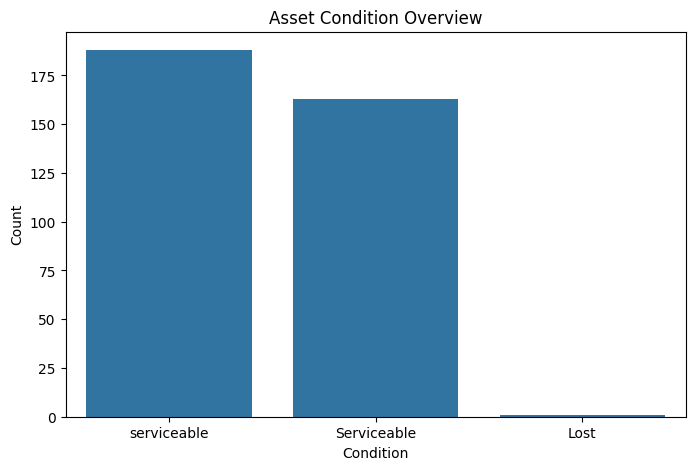

In [9]:
# Condition Distribution
condition_report = df['Asset condition'].value_counts().reset_index()
condition_report.columns = ['Condition', 'Count']

print("Asset Condition Report:")
print(condition_report)

# Optional - Filter for poor condition only
poor_assets = df[df['Asset condition'].str.lower() == 'poor']

print("\nAssets in Poor Condition:")
print(poor_assets[['Asset Description', 'Current Location', 'Responsible officer']])

plt.figure(figsize=(8, 5))
sns.barplot(x='Condition', y='Count', data=condition_report)
plt.title('Asset Condition Overview')
plt.show()


# Financing Insights
Which assets were financed by which source?

Columns Needed
- Financed by/ source of funds
- Asset Description

What You Want to Know
- Total value of assets from each financing source.
- Total number of assets per financing source.


In [10]:
# list all assets under each source
financing_summary = df.groupby('Financed by/ source of funds')['Asset Description'].count().reset_index()

# Rename column for clarity
financing_summary.columns = ['Financing Source', 'Number of Assets']

print(financing_summary)


  Financing Source  Number of Assets
0              GOK               352


It is notable that that our assets are financed by the Government of kenya.

In [11]:
financing_assets = df.groupby('Financed by/ source of funds')['Asset Description'].apply(list).reset_index()

financing_assets


,Financed by/ source of funds,Asset Description
0,GOK,"[keyboard, keyboard, keyboard, keyboard, keybo..."


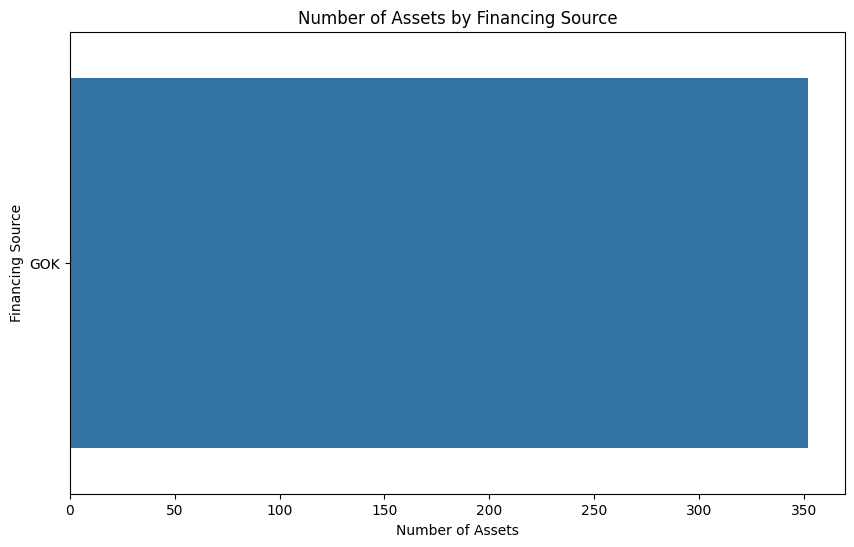

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Assets', y='Financing Source', data=financing_summary)
plt.title('Number of Assets by Financing Source')
plt.show()


# Reporting

**Summary Report**

We generate a simple summary that shows:

- Total Assets	
- Assets in Poor Condition	
- Assets by Financing Source	
- Assets by Location	


In [13]:
print("Asset Management Summary Report")
print(f"Total Assets: {df.shape[0]}")
print(f"Assets in Poor Condition: {df[df['Asset condition'] == 'POOR'].shape[0]}")

print("\nAssets by Financing Source:")
print(df['Financed by/ source of funds'].value_counts())

print("\nAssets by Location:")
print(df['Current Location'].value_counts())


Asset Management Summary Report
Total Assets: 352
Assets in Poor Condition: 0

Assets by Financing Source:
Financed by/ source of funds
GOK    352
Name: count, dtype: int64

Assets by Location:
Current Location
RD                        15
ps                        12
legal                     11
Research & Partnership    10
Telephone Exchange        10
                          ..
PFO                        1
Internal Audit             1
SPFO                       1
Research                   1
R&P                        1
Name: count, Length: 138, dtype: int64


**Visualization Dashboard**

We now build a simple dashboard with matplotlib, seaborn, or even Streamlit .

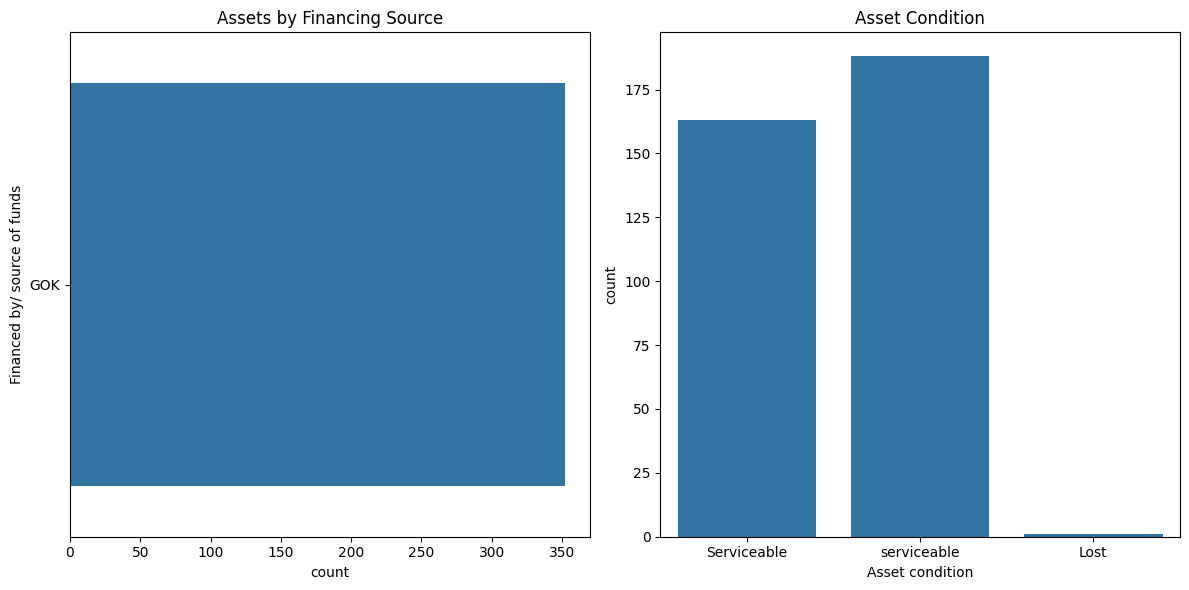

In [14]:
plt.figure(figsize=(12, 6))

# Financing Source Plot
plt.subplot(1, 2, 1)
sns.countplot(y='Financed by/ source of funds', data=df, order=df['Financed by/ source of funds'].value_counts().index)
plt.title('Assets by Financing Source')

# Condition Plot
plt.subplot(1, 2, 2)
sns.countplot(x='Asset condition', data=df)
plt.title('Asset Condition')

plt.tight_layout()
plt.show()


**Exporting the Cleaned Data**

You might want to save your cleaned data for future analysis or sharing with others

In [15]:
df.to_excel('Cleaned_Asset_Register.xlsx', index=False)


In [16]:
# Define columns and initial empty DataFrame
columns = ['Employee ID', 'Name', 'Department', 'Phone', 'Email', 'Assigned Assets']
employees = pd.DataFrame(columns=columns)

# Optional: Add sample data
sample_data = [
    ['EMP001', 'John Doe', 'IT', '0712345678', 'john@example.com', 'Laptop, Printer'],
    
]

# Create DataFrame with sample data
#employees = pd.DataFrame(sample_data, columns=columns)

# Save DataFrame to Excel file in your current directory
employees.to_excel('employees.xlsx', index=False)

print("✅ employees.xlsx created successfully in the current directory!")


✅ employees.xlsx created successfully in the current directory!
